# 03. Player Similarity

In [1]:
# change wd to repo home
import os
if os.getcwd().split('\\')[-1] == 'notebooks':
    os.chdir('..')

In [2]:
from modules.fm_functions import *

In [182]:
# raw data
player_data_2023_raw = pd.read_csv('data/2023_FBRef_meandiff.csv', index_col=1).iloc[:, 3:]
player_data_2023_raw.index = player_data_2023_raw.index + '_2023'
player_data_2022_raw = pd.read_csv('data/2022_FBRef_meandiff.csv', index_col=1).iloc[:, 3:]
player_data_2022_raw.index = player_data_2022_raw.index + '_2022'

In [183]:
player_data_raw = pd.concat([player_data_2022_raw, player_data_2023_raw])

In [184]:
from sklearn.preprocessing import MinMaxScaler
player_data_scaled = MinMaxScaler().fit_transform(player_data_raw)
player_data_scaled = pd.DataFrame(player_data_scaled, index=player_data_raw.index, columns=player_data_raw.columns)

In [238]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.8)

In [241]:
player_data_pca = pd.DataFrame(index=player_data_scaled.index)
pca_types_dict = {}
explained_variance_total = 0

for column_group in stat_types_dict.keys():
        current_columns = stat_types_dict[column_group]
        pca_result = pca.fit_transform(player_data_scaled[current_columns])
        pca_names = f'{column_group}_' + pca.get_feature_names_out()
        pca_types_dict[column_group] = pca_names.tolist()
        player_data_pca[pca_names] = pca_result
        explained_variance_total += pca.explained_variance_ratio_.sum()

explained_variance_total /= len(pca_types_dict)
explained_variance_total

0.8732491442573421

In [242]:
player_data_pca_scaled = MinMaxScaler().fit_transform(player_data_pca)
player_data_pca_scaled = pd.DataFrame(player_data_pca_scaled, index=player_data_pca.index, columns=player_data_pca.columns)

In [274]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

# similarity_matrix = cosine_similarity(player_data_pca_scaled)
similarity_matrix = euclidean_distances(player_data_pca_scaled)
similarity_matrix = pd.DataFrame(similarity_matrix, index=player_data_pca_scaled.index, columns=player_data_pca_scaled.index)

In [282]:
find_most_similar_strings('pascal gross', similarity_matrix.index)

['Pascal Groß_2022',
 'Pascal Groß_2023',
 'Pascal Struijk_2022',
 'Pascal Stenzel_2023',
 'Leandro Trossard_2022']

In [286]:
similarity_matrix.loc['Pascal Groß_2023'].sort_values(ascending=True)[1:21]
# similarity_matrix.loc['Lionel Messi_2022'].sort_values(ascending=True)[1:21]

_Player_
James Ward-Prowse_2022         0.451894
Bruno Fernandes_2023           0.468549
Kevin Stöger_2023              0.496416
Enzo Le Fée_2022               0.545451
José Luis García Vayá_2023     0.565974
Kevin Stöger_2022              0.571193
Gerard Gumbau_2022             0.576145
Benjamin Bourigeaud_2022       0.592163
Alfie Doughty_2023             0.597133
Téji Savanier_2023             0.646812
Alex Iwobi_2022                0.703050
Sergi Darder_2022              0.708767
Trent Alexander-Arnold_2022    0.718962
Branco van den Boomen_2022     0.727720
Óscar Mingueza_2023            0.789233
Cristiano Biraghi_2022         0.789464
Isco_2023                      0.797203
Teun Koopmeiners_2022          0.806701
Daniel Parejo_2022             0.808522
Mathias Jensen_2022            0.812906
Name: Pascal Groß_2023, dtype: float64

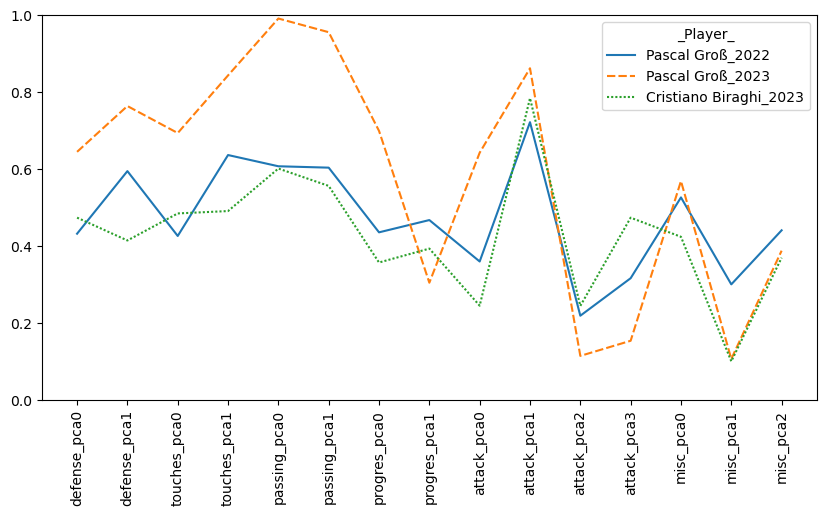

In [291]:
graph_players = ['Pascal Groß_2022',
                 'Pascal Groß_2023',
                 'Cristiano Biraghi_2023']

fig, axs = plt.subplots(figsize=(10,5))
plt.ylim(0, 1)
plt.xticks(rotation=90)
sns.lineplot(data=player_data_pca_scaled.loc[graph_players].T)
plt.show()

In [189]:
def plot_team_radar(data: dict, color='#FF5733') -> None:

    # Each attribute we'll plot in the radar chart.
    labels = list(data.keys())
    values = list(data.values())
    num_vars = len(labels)

    # Split the circle into even parts and save the angles
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # Complete the loop and append the start value to the end.
    values += values[:1]
    labels += labels[:1]
    angles += angles[:1]

    # Create the figure and polar subplot
    fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(polar=True))

    # Draw the outline of our data
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    # Fill it in
    ax.fill(angles, values, color=color, alpha=0.4)

    # Fix axis to go in the right order and start at 12 o'clock
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    # Draw axis lines for each angle and label
    ax.set_thetagrids(np.degrees(angles), labels, fontsize=12, color='#4B0082')

    # Adjust alignment of labels
    for label, angle in zip(ax.get_xticklabels(), angles):
        if angle in (0, np.pi):
            label.set_horizontalalignment('center')
        elif 0 < angle < np.pi:
            label.set_horizontalalignment('left')
        else:
            label.set_horizontalalignment('right')

    # Ensure radar goes from 0 to 20
    ax.set_ylim(0, 1)
    ax.set_rgrids([0.25, 0.50, 0.75, 1.00], color='#AAAAAA', alpha=0.5)

    # Set position of y-labels
    ax.set_rlabel_position(180 / num_vars)

    # Customize appearance
    ax.tick_params(colors='#4B0082')
    ax.tick_params(axis='y', labelsize=10)
    ax.grid(color='#DDDDDD', linestyle='--')
    ax.spines['polar'].set_color('#4B0082')
    ax.set_facecolor('#FAFAFA')

    # Set title with a stylish font
    # ax.set_title(data['name'], y=1.1, fontsize=20, color='#4B0082', fontweight='bold')
    plt.show()

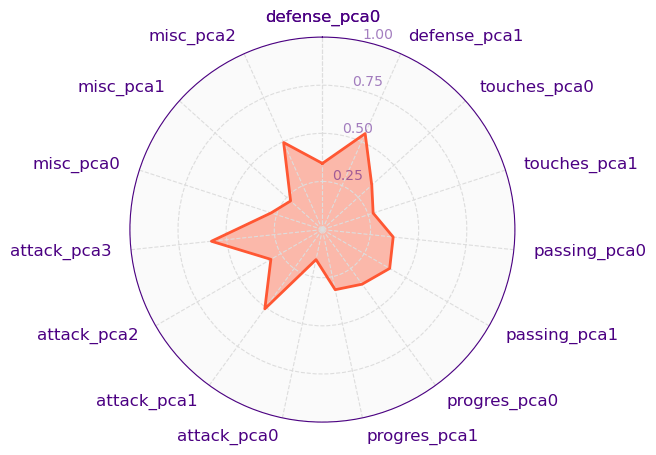

In [258]:
team = ''
season = 2023

plot_data = player_data_pca_scaled.loc[f'{team}_{season}']
# plot_data.index = [idx[0] for idx in plot_data.index.str.split('_')]

plot_team_radar(plot_data.to_dict())

In [177]:
plot_data

defense_pca0    0.123229
defense_pca1    0.567842
touches_pca0    0.074906
touches_pca1    0.371547
passing_pca0    0.168413
passing_pca1    0.417748
progres_pca0    0.373033
progres_pca1    0.146773
attack_pca0     0.358903
attack_pca1     0.434662
attack_pca2     0.176775
misc_pca0       0.103983
misc_pca1       0.530155
Name: Ousmane Dembélé_2022, dtype: float64

# 02. EDA
Get familiar with the data for potential feature engineering

In [1]:
# change wd to repo home
import os
if os.getcwd().split('\\')[-1] == 'notebooks':
    os.chdir('..')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from modules.fm_functions import *
predict_columns = FM_columns[2:]

Load data

In [4]:
import pandas as pd
combined_data = pd.read_csv('./data/combined_data.csv', index_col='Name').iloc[:, 1:].dropna(axis=0)

In [5]:
combined_data.head()

,team_cluster,defense_Blocks_Blocks,defense_Tackles_Tkl,defense_Tackles_TklW,defense_Tackles_Def 3rd,defense_Tackles_Mid 3rd,defense_Tackles_Att 3rd,defense__Int,defense__Clr,possession_Touches_Def Pen,...,Work Rate,Positioning,Acceleration,Agility,Balance,Jumping Reach,Natural Fitness,Pace,Stamina,Strength
Name,,,,,,,,,,,,,,,,,,,,,
Youcef Belaïli,1,0.513527,0.512050,0.419222,0.099565,0.609974,0.616573,0.164482,0.033113,0.005737,...,12,11,14,14,12,9,12,14,13,11
Romain Hamouma,1,0.437854,0.242553,0.134042,0.106117,0.216704,0.219048,0.070122,0.000000,0.000000,...,13,6,14,14,12,8,13,13,12,12
Youssouf Koné,1,0.580240,1.000000,1.000000,1.000000,0.340354,0.000000,0.495600,0.674216,0.201548,...,14,10,14,12,12,9,14,14,15,13
Thomas Mangani,1,0.975392,0.785929,0.615300,0.401151,0.877716,0.266163,0.681635,0.298842,0.131353,...,17,13,12,11,14,12,14,11,15,14
Riad Nouri,1,0.279058,0.405789,0.341717,0.157807,0.460373,0.279212,0.335181,0.094644,0.024060,...,12,6,13,15,12,8,14,13,12,11


## Basic statistics

In [14]:
combined_data[defense_columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1518 entries, Youcef Belaïli to Adama Traoré
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   defense_Blocks_Blocks    1518 non-null   float64
 1   defense_Tackles_Tkl      1518 non-null   float64
 2   defense_Tackles_TklW     1518 non-null   float64
 3   defense_Tackles_Def 3rd  1518 non-null   float64
 4   defense_Tackles_Mid 3rd  1518 non-null   float64
 5   defense_Tackles_Att 3rd  1518 non-null   float64
 6   defense__Int             1518 non-null   float64
 7   defense__Clr             1518 non-null   float64
dtypes: float64(8)
memory usage: 139.0+ KB


<Axes: >

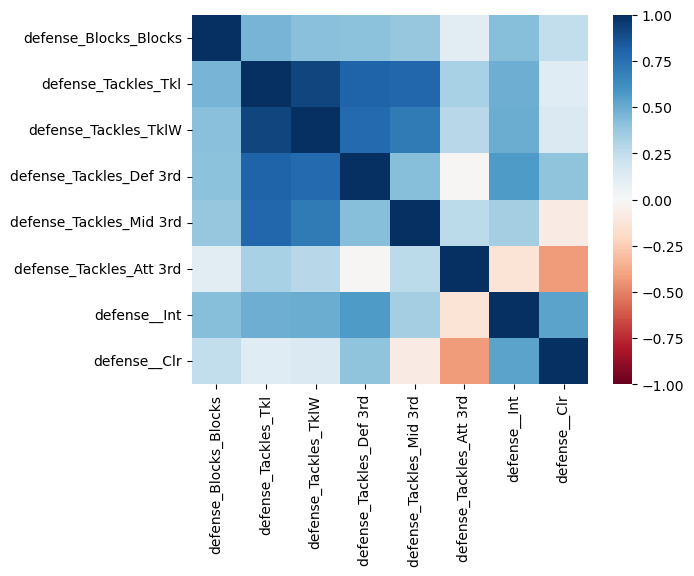

In [28]:
sns.heatmap(combined_data[defense_columns].corr(), cmap='RdBu', center=0, vmin=-1, vmax=1)

In [15]:
combined_data[touches_columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1518 entries, Youcef Belaïli to Adama Traoré
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   possession_Touches_Def Pen  1518 non-null   float64
 1   possession_Touches_Def 3rd  1518 non-null   float64
 2   possession_Touches_Mid 3rd  1518 non-null   float64
 3   possession_Touches_Att 3rd  1518 non-null   float64
 4   possession_Touches_Att Pen  1518 non-null   float64
 5   possession_Touches_Touches  1518 non-null   float64
dtypes: float64(6)
memory usage: 115.3+ KB


<Axes: >

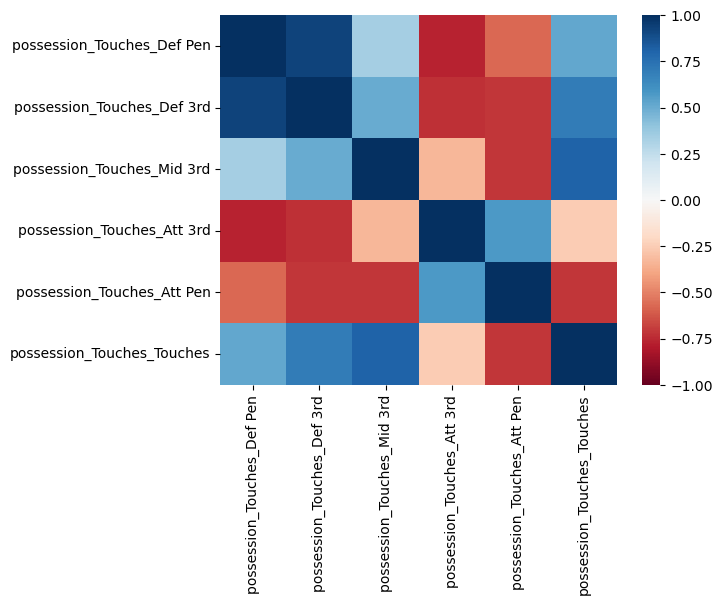

In [29]:
sns.heatmap(combined_data[touches_columns].corr(), cmap='RdBu', center=0, vmin=-1, vmax=1)

In [16]:
combined_data[passing_columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1518 entries, Youcef Belaïli to Adama Traoré
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   passing_Total_Att   1518 non-null   float64
 1   passing_Short_Att   1518 non-null   float64
 2   passing_Medium_Att  1518 non-null   float64
 3   passing_Long_Att    1518 non-null   float64
 4   passing__KP         1518 non-null   float64
 5   passing__CrsPA      1518 non-null   float64
 6   passing__PrgP       1518 non-null   float64
dtypes: float64(7)
memory usage: 127.2+ KB


<Axes: >

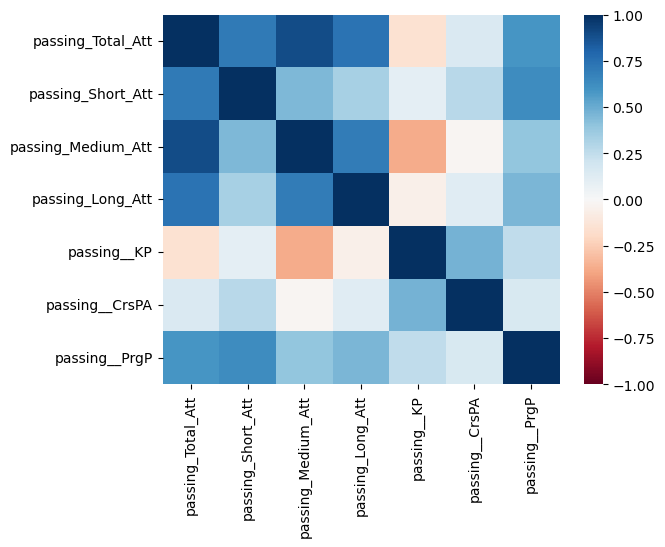

In [35]:
sns.heatmap(combined_data[passing_columns].corr(), cmap='RdBu', center=0, vmin=-1, vmax=1)

In [34]:
combined_data[progres_columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1518 entries, Youcef Belaïli to Adama Traoré
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   possession_Carries_PrgDist  1518 non-null   float64
 1   possession_Carries_TotDist  1518 non-null   float64
 2   possession_Receiving_Rec    1518 non-null   float64
 3   possession_Receiving_PrgR   1518 non-null   float64
 4   possession_Take-Ons_Att     1518 non-null   float64
 5   possession_Take-Ons_Succ    1518 non-null   float64
dtypes: float64(6)
memory usage: 115.3+ KB


<Axes: >

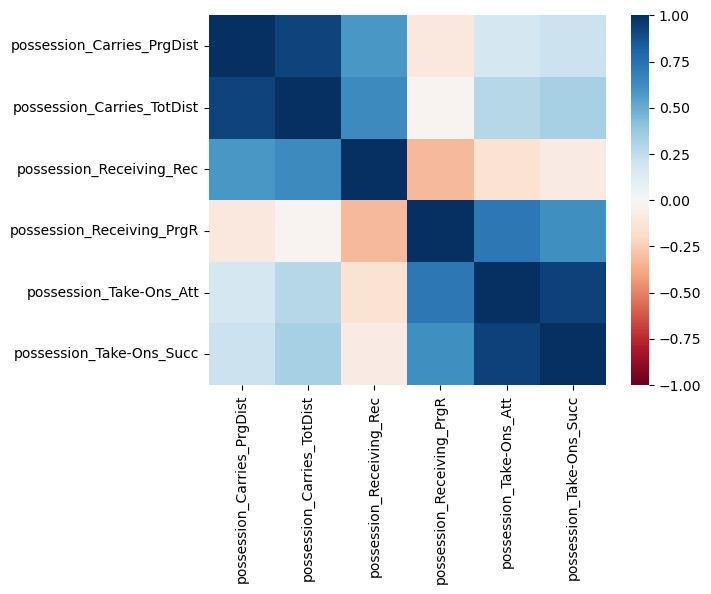

In [32]:
sns.heatmap(combined_data[progres_columns].corr(), cmap='RdBu', center=0, vmin=-1, vmax=1)

In [18]:
combined_data[attack_columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1518 entries, Youcef Belaïli to Adama Traoré
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gca_SCATypes_TO         1518 non-null   float64
 1   gca_SCATypes_Sh         1518 non-null   float64
 2   gca_SCATypes_Fld        1518 non-null   float64
 3   gca_SCATypes_Def        1518 non-null   float64
 4   gca_SCATypes_PassLive   1518 non-null   float64
 5   gca_SCATypes_PassDead   1518 non-null   float64
 6   shooting_Standard_Dist  1518 non-null   float64
 7   shooting_Expected_npxG  1518 non-null   float64
dtypes: float64(8)
memory usage: 139.0+ KB


<Axes: >

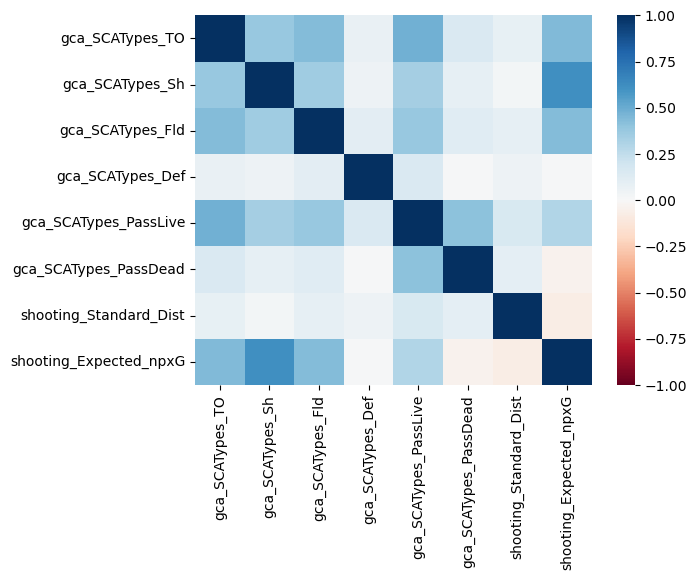

In [31]:
sns.heatmap(combined_data[attack_columns].corr(), cmap='RdBu', center=0, vmin=-1, vmax=1)

In [19]:
combined_data[misc_columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1518 entries, Youcef Belaïli to Adama Traoré
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   playingtime_PlayingTime_Min  1518 non-null   float64
 1   misc_Performance_Fls         1518 non-null   float64
 2   misc_Performance_Fld         1518 non-null   float64
 3   misc_Performance_Off         1518 non-null   float64
 4   misc_AerialDuels_Won         1518 non-null   float64
 5   misc_AerialDuels_Lost        1518 non-null   float64
dtypes: float64(6)
memory usage: 115.3+ KB


<Axes: >

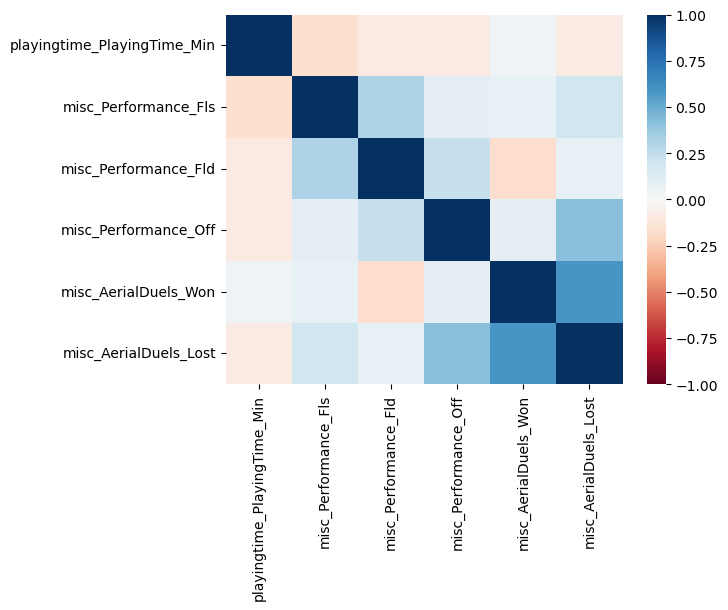

In [30]:
sns.heatmap(combined_data[misc_columns].corr(), cmap='RdBu', center=0, vmin=-1, vmax=1)

<Axes: >

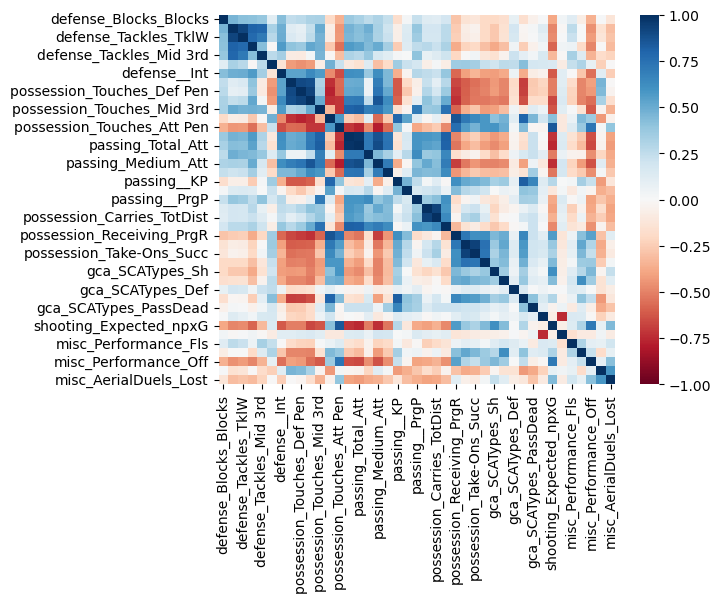

In [24]:
sns.heatmap(combined_data[all_stats_columns].corr(), cmap='RdBu', center=0, vmin=-1, vmax=1)

In [ ]:
from sklearn.decomposition import PCA

X_possession = X[['possession_Touches_Def Pen', 'possession_Touches_Def 3rd',
       'possession_Touches_Mid 3rd', 'possession_Touches_Att 3rd',
       'possession_Touches_Att Pen']]

pca = PCA(n_components=1)
X_possession_pca = pca.fit_transform(X_possession)

In [41]:
combined_data.loc[:, predict_columns[:12]].describe()

,Corners,Crossing,Dribbling,Finishing,First Touch,Free Kick Taking,Heading,Long Shots,Long Throws,Marking,Passing,Penalty Taking
count,1518.00000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000
mean,8.48946,10.676548,12.120553,10.062582,13.013834,8.956522,11.072464,10.358366,7.548748,10.176548,12.940053,9.963109
std,3.52422,2.793507,2.517564,3.082373,1.805417,3.359883,3.238287,2.870651,3.301175,3.540023,1.688994,3.194831
min,1.00000,2.000000,1.000000,2.000000,6.000000,1.000000,3.000000,2.000000,1.000000,1.000000,7.000000,1.000000
25%,6.00000,9.000000,11.000000,8.000000,12.000000,6.000000,8.000000,8.000000,5.000000,7.000000,12.000000,8.000000
50%,8.00000,11.000000,12.000000,10.000000,13.000000,9.000000,11.000000,11.000000,7.000000,11.000000,13.000000,10.000000
75%,11.00000,13.000000,14.000000,12.000000,14.000000,12.000000,14.000000,12.000000,10.000000,13.000000,14.000000,12.000000
max,20.00000,19.000000,20.000000,19.000000,20.000000,20.000000,20.000000,19.000000,20.000000,18.000000,20.000000,20.000000


In [42]:
combined_data.loc[:, predict_columns[12:24]].describe()

,Tackling,Technique,Aggressiion,Anticipation,Bravery,Composure,Concentration,Vision,Decision,Determination,Flair,Leadership
count,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000
mean,11.237813,13.244401,12.352437,13.196311,13.135046,12.754282,12.354414,12.219368,12.506588,13.963109,11.583663,10.182477
std,3.520460,1.923098,2.747618,1.734808,2.300915,1.750666,1.779789,2.141339,1.622890,2.336539,3.296677,3.015501
min,2.000000,5.000000,4.000000,4.000000,6.000000,5.000000,6.000000,3.000000,5.000000,1.000000,2.000000,1.000000
25%,8.000000,12.000000,11.000000,12.000000,12.000000,12.000000,11.000000,11.000000,12.000000,13.000000,9.000000,8.000000
50%,12.000000,13.000000,13.000000,13.000000,13.000000,13.000000,12.000000,12.000000,13.000000,14.000000,12.000000,10.000000
75%,14.000000,14.000000,14.000000,14.000000,15.000000,14.000000,14.000000,14.000000,13.000000,15.000000,14.000000,12.000000
max,20.000000,20.000000,19.000000,20.000000,20.000000,20.000000,19.000000,20.000000,18.000000,20.000000,20.000000,20.000000


In [43]:
combined_data.loc[:, predict_columns[24:]].describe()

,Off The Ball,Teamwork,Work Rate,Positioning,Acceleration,Agility,Balance,Jumping Reach,Natural Fitness,Pace,Stamina,Strength
count,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000
mean,12.317523,13.698946,13.930830,11.113307,13.352437,12.906456,13.127141,11.355731,13.916996,13.563900,13.866930,12.490119
std,2.692179,2.101169,2.055867,3.135746,1.854362,1.784116,1.865352,3.075185,2.016338,1.731728,1.694755,2.549878
min,1.000000,3.000000,6.000000,2.000000,5.000000,7.000000,6.000000,2.000000,5.000000,5.000000,5.000000,4.000000
25%,11.000000,12.000000,13.000000,9.000000,12.000000,12.000000,12.000000,9.000000,13.000000,12.000000,13.000000,11.000000
50%,13.000000,14.000000,14.000000,12.000000,13.000000,13.000000,13.000000,11.000000,14.000000,13.000000,14.000000,13.000000
75%,14.000000,15.000000,15.000000,14.000000,15.000000,14.000000,14.000000,14.000000,15.000000,15.000000,15.000000,14.000000
max,20.000000,20.000000,20.000000,19.000000,20.000000,19.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000


In [ ]:
from sklearn.decomposition import PCA

X_possession = X[['possession_Touches_Def Pen', 'possession_Touches_Def 3rd',
       'possession_Touches_Mid 3rd', 'possession_Touches_Att 3rd',
       'possession_Touches_Att Pen']]

pca = PCA(n_components=1)
X_possession_pca = pca.fit_transform(X_possession)